### Music Recommendation:

Music recommender system can suggest songs to users based on their listening pattern.

#### Author:Thilagavathy R Vasantharaja

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import os
# Any results you write to the current directory are saved as output.


In [9]:
path='C:\\Users\\vasanth\\Desktop\\Anaconda1\\Anaconda\\Internship\\LetsGrowMore\\kkbox-music-recommendation-challenge'

In [12]:
dir_list=os.listdir(path)
print(dir_list)

['members.csv', 'members.csv.7z', 'sample_submission.csv.7z', 'songs.csv', 'songs.csv.7z', 'song_extra_info.csv', 'song_extra_info.csv.7z', 'test.csv', 'test.csv.7z', 'train.csv', 'train.csv.7z']


In [18]:
os.getcwd()

'C:\\Users\\vasanth\\Desktop\\Anaconda1\\Anaconda\\Internship\\LetsGrowMore'

In [30]:
os.chdir('kkbox-music-recommendation-challenge')

In [31]:
os.getcwd()

'C:\\Users\\vasanth\\Desktop\\Anaconda1\\Anaconda\\Internship\\LetsGrowMore\\kkbox-music-recommendation-challenge'

In [42]:
os.listdir(os.getcwd())

['members.csv.7z',
 'members_csv',
 'sample_submission.csv.7z',
 'songs.csv.7z',
 'songs_csv',
 'song_extra_info.csv.7z',
 'song_extra_info_csv',
 'test.csv.7z',
 'test_csv',
 'train.csv',
 'train.csv.7z']

In [45]:

train = pd.read_csv('train.csv')
test=pd.read_csv("test.csv")
members=pd.read_csv("members.csv")
songs=pd.read_csv("songs.csv")
print('train',train.shape)
print('test',test.shape)
print('members',members.shape)
print('songs',songs.shape)

train (7377418, 6)
test (2556790, 6)
members (34403, 7)
songs (2296320, 7)


In [46]:
print('train')
print(train.head())

train
                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  
0              Explore  online-playlist       1  
1  Local playlist more   local-playlist       1  
2  Local playlist more   local-playlist       1  
3  Local playlist more   local-playlist       1  
4              Explore

In [47]:
print('members')
print(members.head())

members
                                           msno  city  bd gender  \
0  XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1  UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2  D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3  mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4  q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   

   registered_via  registration_init_time  expiration_date  
0               7                20110820         20170920  
1               7                20150628         20170622  
2               4                20160411         20170712  
3               9                20150906         20150907  
4               4                20170126         20170613  


In [48]:
print('songs')
print(songs.head())

songs
                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name                            composer     lyricist  language  
0  張信哲 (Jeff Chang)                                  董貞          何啟弘       3.0  
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM        TEDDY      31.0  
2      SUPER JUNIOR                                 NaN          NaN      31.0  
3             S.H.E                                 湯小康          徐世珍       3.0  
4              貴族精選                         Traditional  Traditional      52.0  


#### Finding unique songs

In [49]:
print(train.target.value_counts()*100/train.target.value_counts().sum())
print('How many unique songs ',len(train.song_id.unique()))

1    50.351708
0    49.648292
Name: target, dtype: float64
How many unique songs  359966


In [50]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 6)
repeats=train[train.target==1]
song_repeats=repeats.groupby('song_id',as_index=False).msno.count()
song_repeats.columns=['song_id','count']

In [51]:
song_repeats=pd.DataFrame(song_repeats).merge(songs,left_on='song_id',right_on='song_id')
print('median length of songs repeated',song_repeats.sort_values(by='count',ascending=False)[:2000].song_length.median())
print('median length of songs repeated',songs.song_length.median())

median length of songs repeated 246647.5
median length of songs repeated 226627.0


#### Which songs are getting repeated

In [52]:
print("Top 20 songs repeated")
repeats.song_id.value_counts()[:20]

Top 20 songs repeated


reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    10885
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    10556
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=     9808
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=     9411
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=     9004
U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=     8787
YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=     8780
M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=     8403
43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=     8112
J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=     7903
cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=     7725
750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=     7608
IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=     7224
+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=     7061
DLBDZhOoW7zd7GBV99bi92ZXYUS26lzV+jJKbHshP5c=     6901
v/3onppBGoSpGsWb8iaCIO8eX5+iacbH5a4ZUhT7N54=     6879
p/yR06j/RQ2J6yGCFL0K+1R06OeG+eXcwxRgOHDo/Tk=     6536
Xpjwi8UAE2Vv9PZ6cZnhc58MCtl3cKZEO1sdAkqJ4mo=     6399
OaEbZ6TJ1NePtNUeEgWsvFLeopkS

In [54]:
pip install wordcloud

#### Artisits of most common songs

In [55]:
import matplotlib.pyplot as plt    
from wordcloud import WordCloud

def displaywc(txt,title):
    txt=""
    for i in g:
        txt+=str(i)
    wordcloud = WordCloud(background_color='white').generate(txt)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

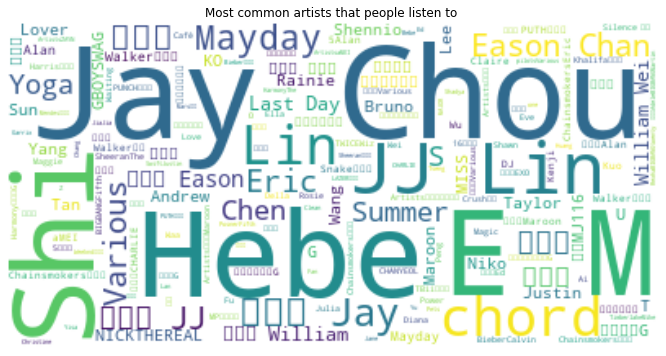

In [56]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].artist_name.tolist()
#TODO Investigate how to display chinese
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common artists that people listen to ')

#### Language of most common songs

Text(0.5, 0, 'Language')

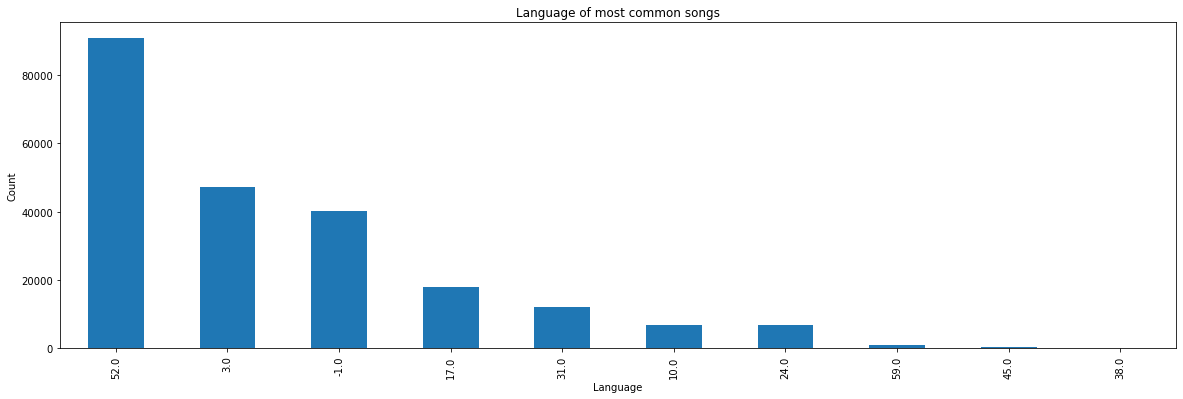

In [57]:
df=pd.DataFrame(song_repeats.sort_values(by='count',ascending=False))
df.language.value_counts().plot(kind='bar')
plt.title('Language of most common songs')
plt.ylabel('Count')
plt.xlabel('Language')

Text(0, 0.5, 'count')

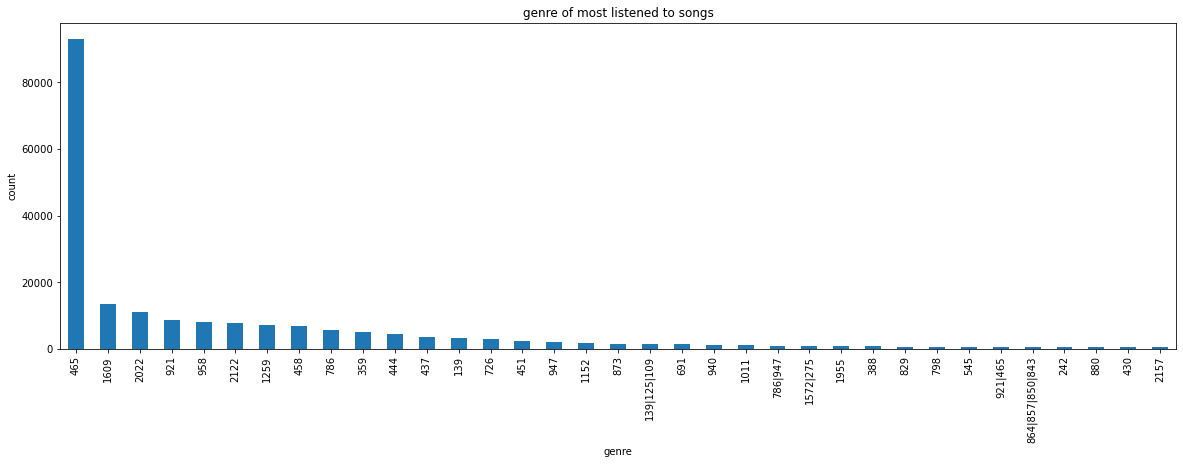

In [58]:
df.genre_ids.value_counts()[:35].plot(kind='bar')
plt.title('genre of most listened to songs')
plt.xlabel('genre')
plt.ylabel('count')

#### Most common lyricist that people listen

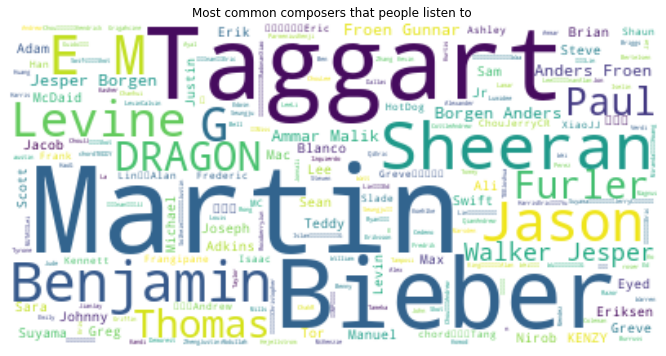

In [59]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].composer.tolist()
#TODO Investigate how to display chinese
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common composers that people listen to ')

#### Most common composers that people listen

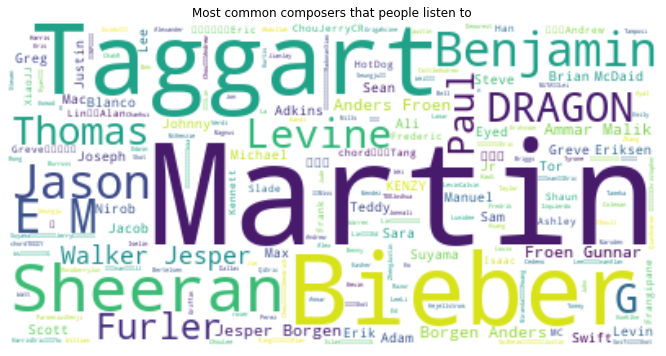

In [60]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].composer.tolist()
#TODO Investigate how to display chinese
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common composers that people listen to ')

In [61]:
print('Users that listen to the same song again and again')
repeats.msno.value_counts()[:10]

Users that listen to the same song again and again


o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    3288
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    2818
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    2791
MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    2069
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=    1978
4DlS5LiANEKlMTQD08dakyV1JWwPYI/n1wyjx4ImjPc=    1814
JkQacE3rvmhh65R04eDLbu+M7MCkpzmHwMGrbZo0puc=    1806
uCDJmSDTzA5PpnYGqKvNmFbwBIoS3jIXFbO5YfoCv/Y=    1794
1wiu2UfN0BNhHfPTrDS3S/rQkX/vnwDoKH6ODTUdH9k=    1737
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    1735
Name: msno, dtype: int64

Text(0, 0.5, 'count')

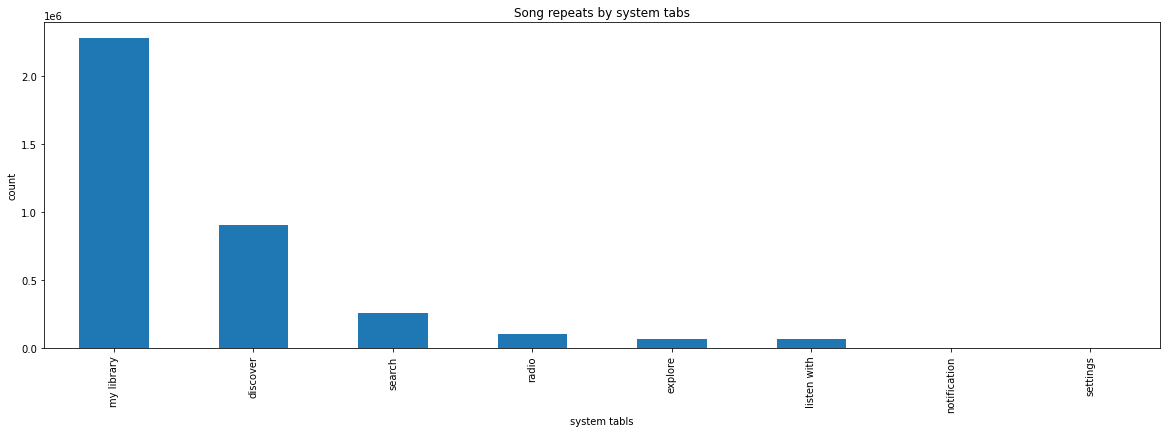

In [62]:
repeats.source_system_tab.value_counts().plot(kind='bar')
#the name of the tab where the event was triggered. 
#System tabs are used to categorize KKBOX mobile apps functions.
#For example, tab my library contains functions to manipulate the local storage, 
#and tab search contains functions relating to search.
plt.title('Song repeats by system tabs')
plt.xlabel('system tabls')
plt.ylabel('count')

Text(0, 0.5, 'count')

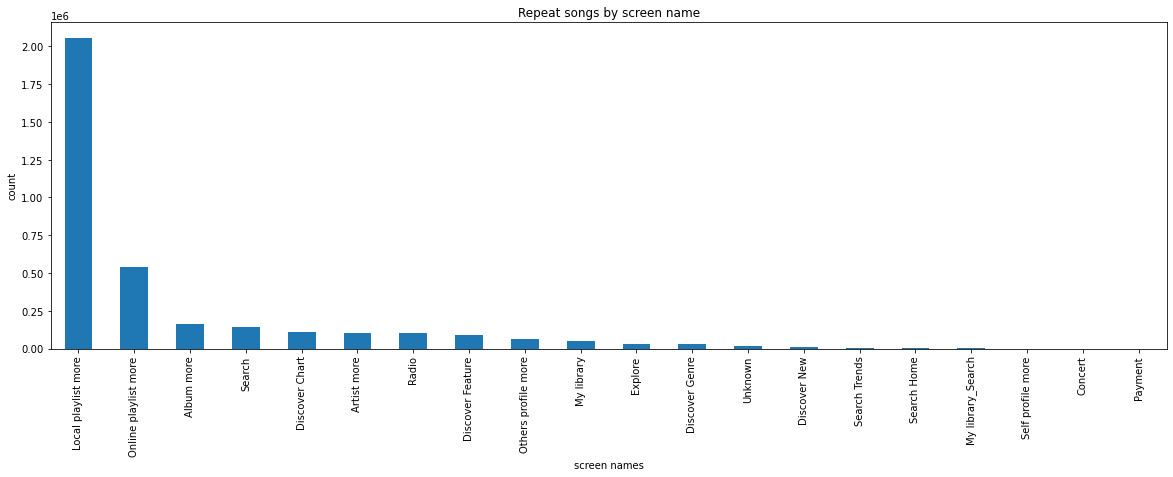

In [63]:
#source_screen_name: name of the layout a user sees. 
repeats.source_screen_name.value_counts().plot(kind='bar')
plt.title('Repeat songs by screen name')
plt.xlabel('screen names')
plt.ylabel('count')

Text(0, 0.5, 'count')

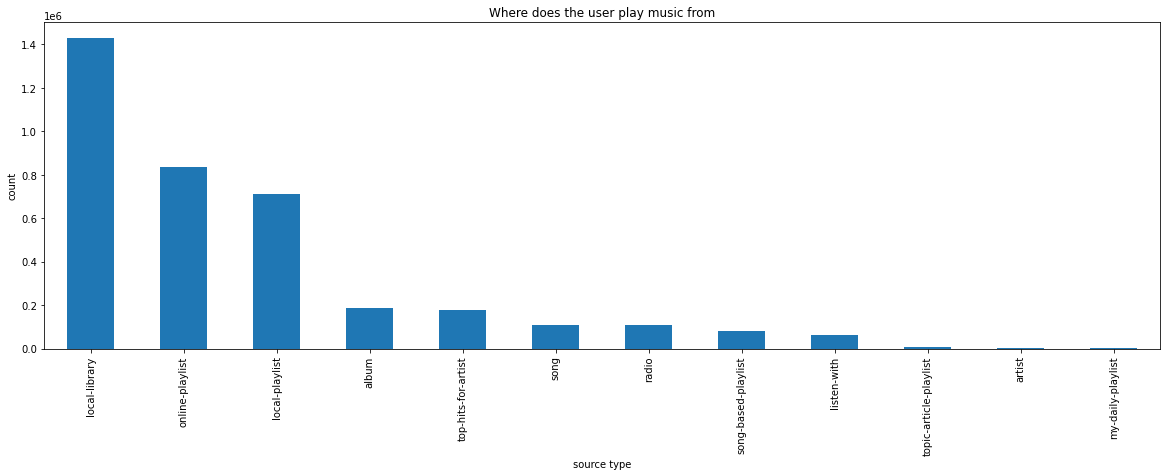

In [64]:
#source_type: an entry point a user first plays music on mobile apps. 
#An entry point could be album, online-playlist, song .. etc. 
repeats.source_type.value_counts().plot(kind='bar')
plt.title('Where does the user play music from')
plt.xlabel('source type')
plt.ylabel('count')

In [65]:
user_repeats=repeats.merge(members,left_on='msno',right_on='msno',how='left')
print("users who repeat")
user_repeats.msno.value_counts()[:20]


users who repeat


o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    3288
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    2818
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    2791
MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    2069
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=    1978
4DlS5LiANEKlMTQD08dakyV1JWwPYI/n1wyjx4ImjPc=    1814
JkQacE3rvmhh65R04eDLbu+M7MCkpzmHwMGrbZo0puc=    1806
uCDJmSDTzA5PpnYGqKvNmFbwBIoS3jIXFbO5YfoCv/Y=    1794
1wiu2UfN0BNhHfPTrDS3S/rQkX/vnwDoKH6ODTUdH9k=    1737
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    1735
7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=    1715
HVcWdf8CEo9s6qwt5V7TpoPYJfRlQSTA6b7kxEAImpc=    1710
mDJCU+fKu/mbdk9l4SmPYiJwpeMyK44o9wmG1X3735A=    1607
V39VxDdE9SgMQZnX58oQChm9W056pw2lC3TiifMfkKw=    1602
LThaiVqGGnVTPmTcmwN/LLo4fVb5dzkduzd7s1SgzIA=    1578
EZmIP7zKgqKwpEHnuDjRIkzCmcLNlHn4hkiglZ5LxK8=    1539
00qmlWC3H/cjf2Ig1li5xIO0VNDRgBX0f9ilouDBEZs=    1533
x+k/zTEqdgYq6O+r1iDjKRaQnaCS5118gzBe8c12r1Y=    1503
K7obY5lUlZTd6a/byE9NG/e7Q/dlgHfppLbYk8OL7os=  

Text(0, 0.5, 'count')

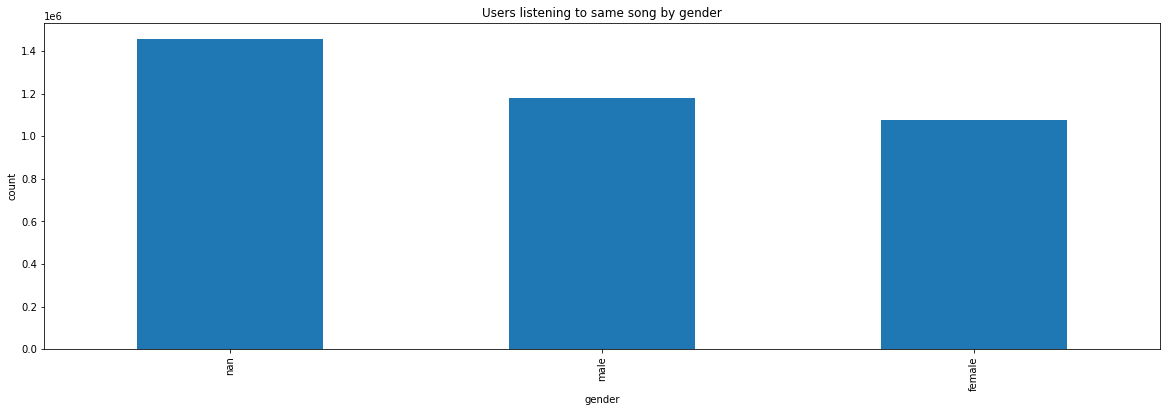

In [66]:
user_repeats.gender.value_counts(dropna=False).plot(kind='bar')
plt.title('Users listening to same song by gender')
plt.xlabel('gender')
plt.ylabel("count")


Text(0, 0.5, 'count')

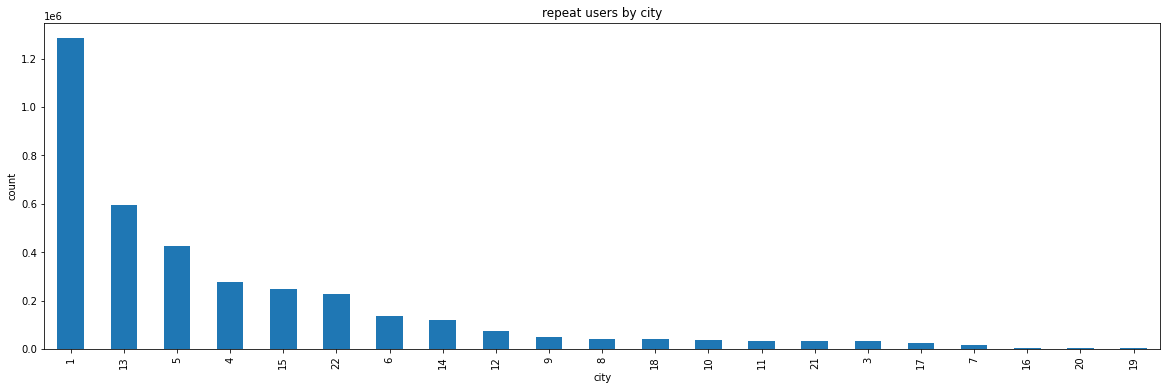

In [67]:
user_repeats.city.value_counts().plot(kind='bar')
plt.title('repeat users by city')
plt.xlabel('city')
plt.ylabel('count')

Text(0, 0.5, 'count')

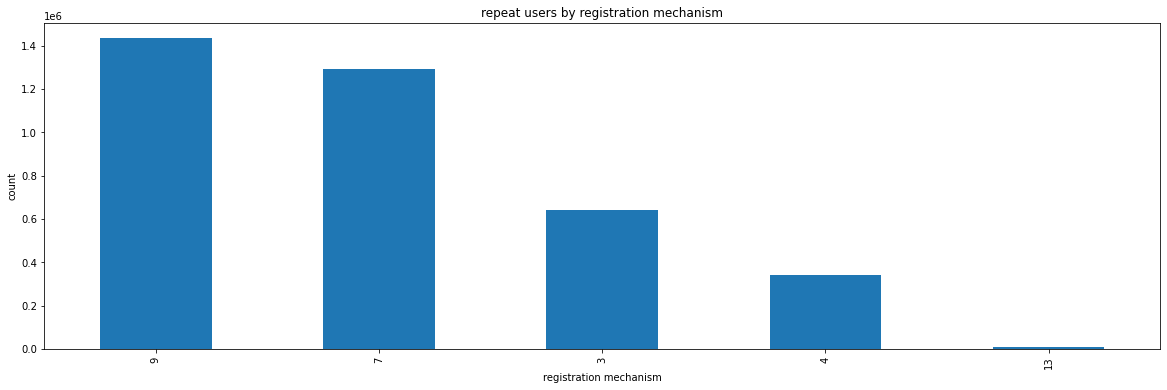

In [68]:
user_repeats.registered_via.value_counts().plot(kind='bar')
plt.title('repeat users by registration mechanism')
plt.xlabel('registration mechanism')
plt.ylabel('count')